In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

For this tutorial I will be using the **fmri** data set which comes along with seaborn when you install it.But I could not find much details about the dataset,so I need to dig down to find the
details about the dataset.Note that once you load the dataset, it is nothing but a pandas dataframe object and we can use all the commands,functions and trics of pandas are applicable for the analysis.

In [2]:
fmri = sns.load_dataset("fmri")

In [3]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [4]:
fmri.describe()

,timepoint,signal
count,1064.000000,1064.000000
mean,9.000000,0.003540
std,5.479801,0.093930
min,0.000000,-0.255486
25%,4.000000,-0.046070
50%,9.000000,-0.013653
75%,14.000000,0.024293
max,18.000000,0.564985


In [6]:
fmri.tail()

,subject,timepoint,event,region,signal
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
1063,s0,0,cue,parietal,-0.006899


In [7]:
fmri["region"].unique()

array(['parietal', 'frontal'], dtype=object)

In [14]:
fmri["region"].nunique()

2

In [8]:
fmri["event"].unique()

array(['stim', 'cue'], dtype=object)

In [15]:
fmri["event"].nunique()

2

In [9]:
fmri["subject"].unique()

array(['s13', 's5', 's12', 's11', 's10', 's9', 's8', 's7', 's6', 's4',
       's3', 's2', 's1', 's0'], dtype=object)

In [16]:
fmri["subject"].nunique()

14

In [13]:
fmri["timepoint"].unique()

array([18, 14, 17,  9, 16, 15,  0, 13, 12, 11, 10,  3,  7,  8,  2,  6,  5,
        4,  1], dtype=int64)

In [17]:
fmri["timepoint"].nunique()

19

In [18]:
fmri["signal"].unique()

array([-0.01755158, -0.08088293, -0.08103302, ..., -0.00493911,
       -0.02536671, -0.00689923])

In [20]:
fmri["signal"].nunique()

1064

With all the above commands, we get the most important details we need to further explore the dataset. Take a moment and write down all of the info you gained about this dataset up to now, I will leave it you as an exercise.

### Plotting subsets of data with semantic mappings

The lineplot() function in seaborn has the same flexibility as it's cousin scatterplot(): it can show up to three additional variables by modifying the hue, size, and style of the plot elements. It does so using the same API as scatterplot(), meaning that we don’t need to stop and think about the parameters that control the look of lines vs. points in matplotlib.

Using semantics in lineplot() will also determine how the data get aggregated. For example, adding a hue semantic with two levels splits the plot into two lines and error bands, coloring each to indicate which subset of the data they correspond to.

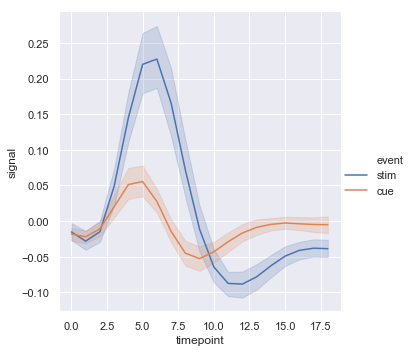

In [21]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri)

Adding a style semantic to a line plot changes the pattern of dashes in the line by default:

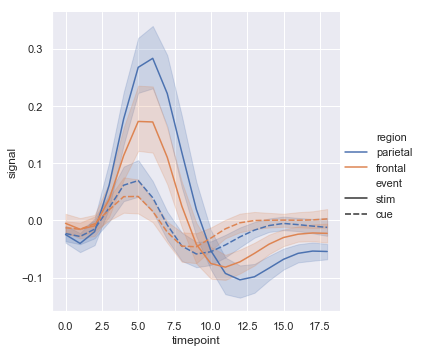

In [22]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",kind="line", data=fmri)

But you can identify subsets by the markers used at each observation, either together with the dashes or instead of them like below:

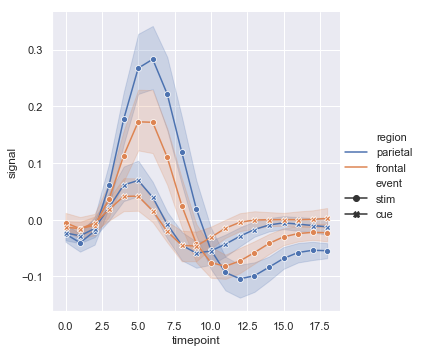

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri)

As with scatter plots, be cautious about making line plots using multiple semantics. While sometimes informative, they can also be difficult to parse and interpret. But even when you are only examining changes across one additional variable, it can be useful to alter both the color and style of the lines. This can make the plot more accessible when printed to black-and-white or viewed by someone with color blindness:

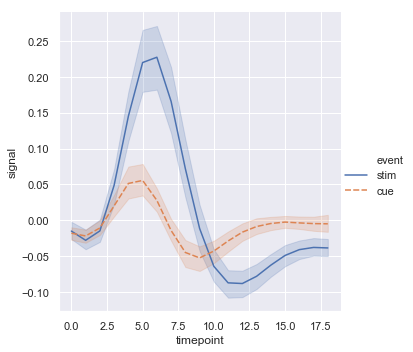

In [24]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",kind="line", data=fmri)

When you are working with repeated measures data (that is, you have units that were sampled multiple times), you can also plot each sampling unit separately without distinguishing them through semantics. This avoids cluttering the legend:

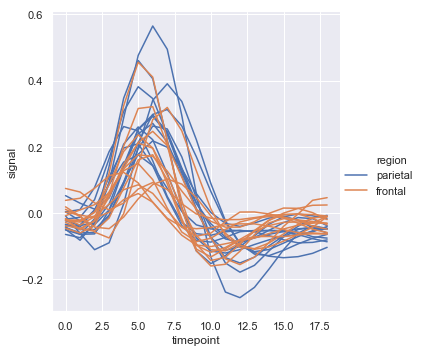

In [25]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"))

let us plot for same thing with **cue** event now instead of **stim**, as shown below:

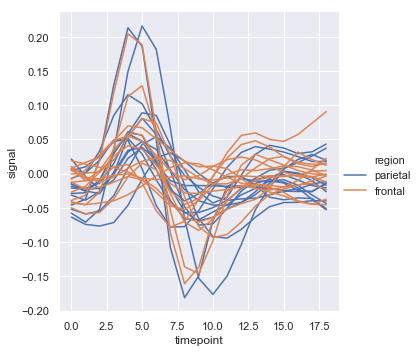

In [39]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'cue'"))

### Showing multiple relationships with facets

We’ve emphasized in this tutorial that, while these functions, *relplot(),lineplot()and scatterplot()* can show several semantic variables at once, it’s not always effective to do so. But what about when you do want to understand how a relationship between two variables depends on more than one other variable?

The best approach may be to make more than one plot. Because *relplot()* and it's children *lineplot() and scatterplot()* is based on the **FacetGrid**, this is easy to do. To show the influence of an additional variable, instead of assigning it to one of the semantic roles (like *hue*,*style* or *size*) in the plot, use it to “facet” the visualization. This means that you make multiple axes and plot subsets of the data on each of them:

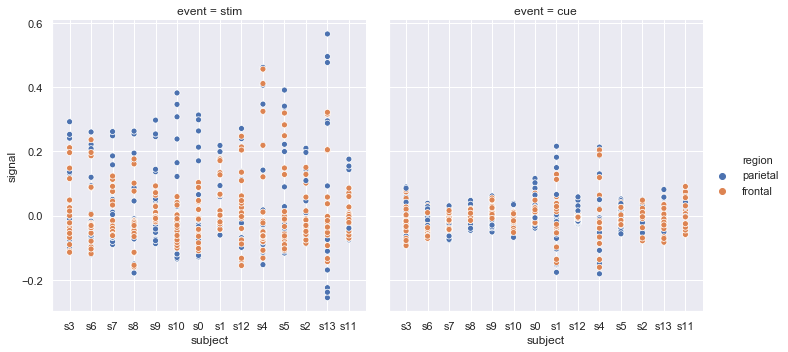

In [42]:
sns.relplot(x="subject", y="signal", hue="region",
            col="event", data=fmri)

You can also show the influence two variables this way: one by faceting on the columns and one by faceting on the rows. As you start adding more variables to the grid, you may want to decrease the figure size. Remember that the size FacetGrid is parameterized by the height and aspect ratio of each facet:

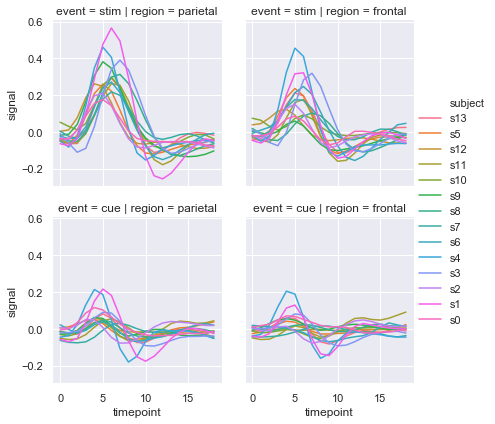

In [43]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri)

When you want to examine effects across many levels of a variable, it can be a good idea to facet that variable on the columns and then “wrap” the facets into the rows:

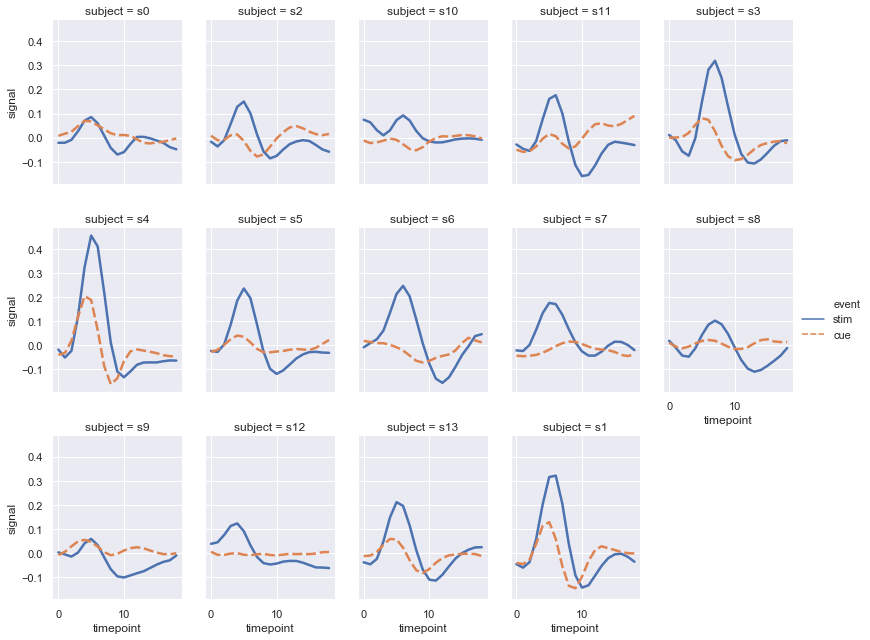

In [44]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"))

These visualizations, which are often called “lattice” plots or “small-multiples”, are very effective because they present the data in a format that makes it easy for the eye to detect both overall patterns and deviations from those patterns. While you should make use of the flexiblity afforded by scatterplot() and relplot(), always try to keep in mind that several simple plots are usually more effective than one complex plot.